In [1]:
from bs4 import BeautifulSoup, NavigableString
import pandas as pd
import requests


url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

covid_table_id = []
for table in soup.find_all('table'):
    covid_table_id.append(table['id'])


table = soup.find('table', id=covid_table_id[0])
column_names = []

thead = table.find_all('thead')[0]
th_tags = thead.find_all('th')

for th in th_tags:
    col_name = []
    for item in th.contents:
        if isinstance(item, NavigableString):
            col_name.append(item.strip(',+').strip())
        elif item.get_text().strip():
            col_name.append(item.get_text().strip())
    column_names.append(' '.join(col_name))

tbody = table.find_all('tbody')[0]
data = []
for row in tbody.find_all('tr'):
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.get_text().strip().replace(',', '').strip('+'))
    data.append(row_data)


df = pd.DataFrame(data, columns=column_names)
TABLE_COLUMNS = ["Country", "Total Cases", "New Cases",
                 "Total Deaths", "New Deaths", "Total Recovered",
                 "Active Cases", "Serious", "Cases Per 1M",
                 "Deaths Per 1M", "Total Tests", "Tests Per 1M", "Continent"]

if len(df.columns) == len(TABLE_COLUMNS):
    df.columns = TABLE_COLUMNS

num_cols = ["Total Cases", "New Cases", "Total Deaths",
            "New Deaths", "Total Recovered", "Active Cases"]


for col in num_cols:
    df[num_cols] = df[num_cols].replace('', 0).replace('N/A', 0)

for col in num_cols:
    try:
        df[col] = df[col].astype(int)
    except Exception as error:
        print(f"Error on col[{col}]: {error}")


df = df.sort_values(by=['Total Deaths'], ascending=False)

print(df)


df.to_csv('coronavirus.csv', sep=';', encoding='utf-8', index=False)


       #     Country Other  Total Cases  New Cases  Total Deaths  New Deaths  \
7                    World    697320077       1121       6934072           4   
2                   Europe    250790529       1039       2078038           2   
0            North America    128997336          0       1652633           0   
1                     Asia    220810861         82       1551534           2   
3            South America     69178247          0       1362310           0   
..   ...               ...          ...        ...           ...         ...   
230  223  Falkland Islands         1930          0             0           0   
229  222      Saint Helena         2166          0             0           0   
232  225              Niue          889          0             0           0   
234  227           Tokelau           80          0             0           0   
235  228      Vatican City           29          0             0           0   

     Total Recovered New Recovered  Act

In [3]:
import pandas as pd
 
df = pd.read_csv('coronavirus.csv', sep=';')
 
df.fillna(0, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '').astype(float)
        except:
            pass
 

if '#' in df.columns:
    df.drop(columns=['#'], inplace=True)
 

df.drop_duplicates(inplace=True)
 
df.to_csv('coronavirus_cleaned.csv', sep=';', index=False)
 
print("Nettoyage terminé. Données sauvegardées dans 'coronavirus_cleaned.csv'.")

Nettoyage terminé. Données sauvegardées dans 'coronavirus_cleaned.csv'.


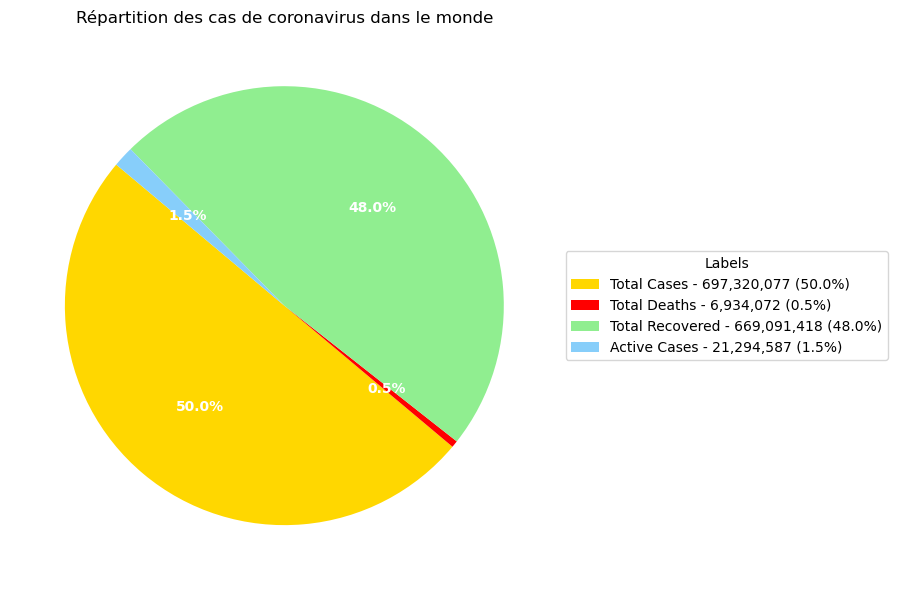

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv('coronavirus.csv', sep=';')
 
world_data = df[df['Country Other'] == 'World']
 
total_cases = world_data['Total Cases'].values[0]
total_deaths = world_data['Total Deaths'].values[0]
total_recovered = world_data['Total Recovered'].values[0]
active_cases = world_data['Active Cases'].values[0]
 
sizes = [total_cases, total_deaths, total_recovered, active_cases]
colors = ['gold', 'red', 'lightgreen', 'lightskyblue']
total = sum(sizes)
 
labels = [
    f'Total Cases - {total_cases:,} ({(total_cases/total)*100:.1f}%)',
    f'Total Deaths - {total_deaths:,} ({(total_deaths/total)*100:.1f}%)',
    f'Total Recovered - {total_recovered:,} ({(total_recovered/total)*100:.1f}%)',
    f'Active Cases - {active_cases:,} ({(active_cases/total)*100:.1f}%)'
]
 
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=None, colors=colors,
                                  autopct='%1.1f%%', startangle=140,
                                  textprops=dict(color="w"))
 
ax.legend(wedges, labels,
          title="Labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Répartition des cas de coronavirus dans le monde")
plt.tight_layout()
plt.show()

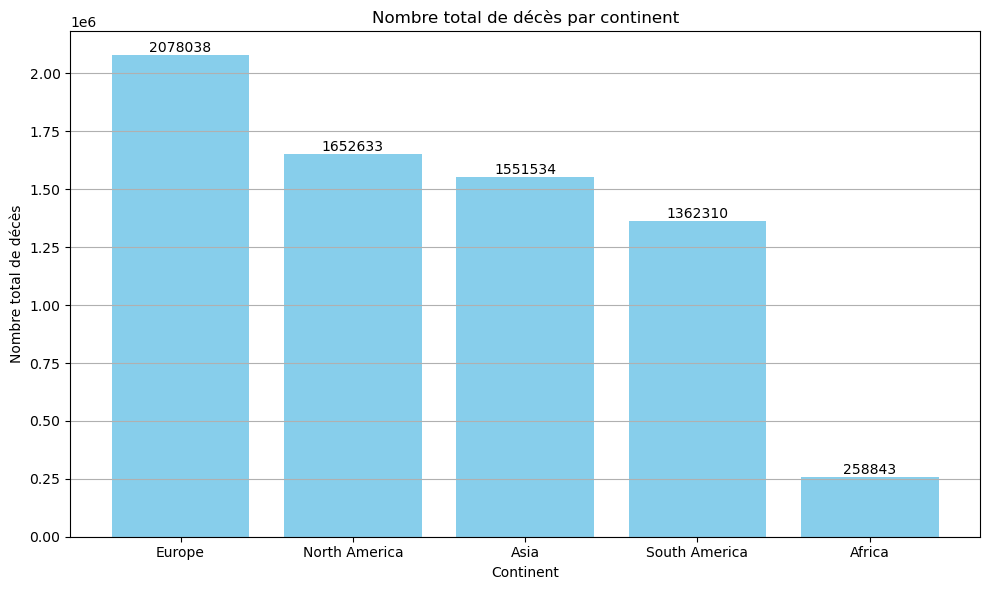

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('coronavirus_cleaned.csv', sep=';')
continents = ['Europe', 'North America', 'Asia', 'South America', 'Africa']
data_continents = data[data['Country Other'].isin(continents)]
sorted_data = data_continents.sort_values(by='Total Deaths', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_data['Country Other'], sorted_data['Total Deaths'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.ylabel('Nombre total de décès')
plt.xlabel('Continent')
plt.title('Nombre total de décès par continent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

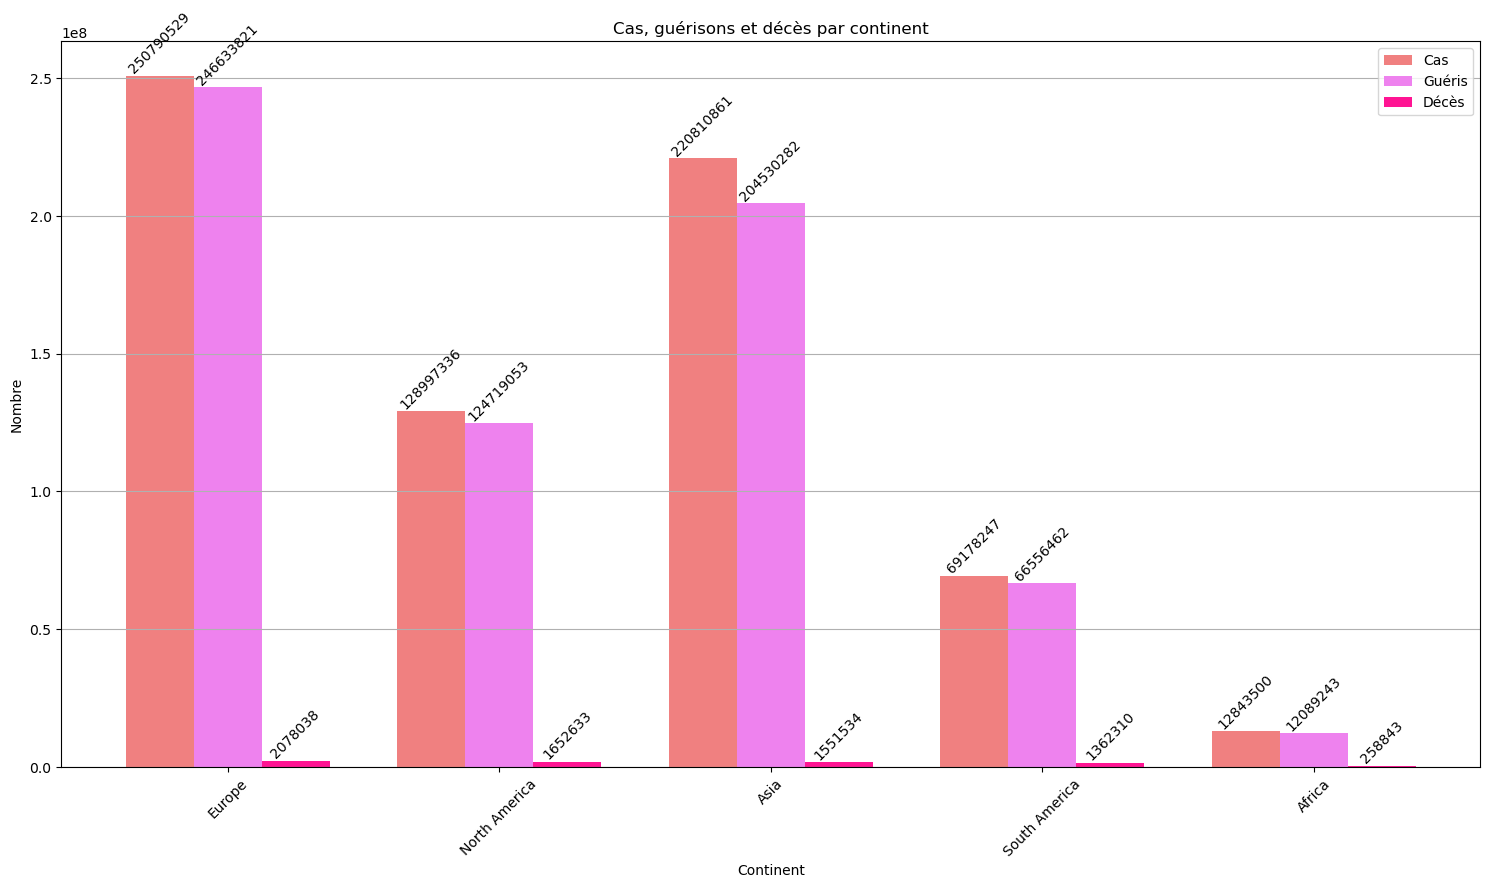

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
df = pd.read_csv('coronavirus.csv', sep=';')
 
continents = ['Asia', 'Europe', 'North America', 'South America', 'Africa']
df_continents = df[df['Country Other'].isin(continents)]
 
plt.figure(figsize=(15, 9))
 
bar_width = 0.25
index = np.arange(len(df_continents))
bar1 = plt.bar(index, df_continents['Total Cases'], bar_width, color='lightcoral', label='Cas')
bar2 = plt.bar(index + bar_width, df_continents['Total Recovered'], bar_width, color='violet', label='Guéris')
bar3 = plt.bar(index + 2*bar_width, df_continents['Total Deaths'], bar_width, color='deeppink', label='Décès')
 
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom', fontsize=10, rotation=45)
 
plt.xlabel('Continent')
plt.ylabel('Nombre')
plt.title('Cas, guérisons et décès par continent')
plt.xticks(index + bar_width, df_continents['Country Other'], rotation=45)
plt.legend()
 
plt.tight_layout()
plt.grid(axis='y')
plt.show()

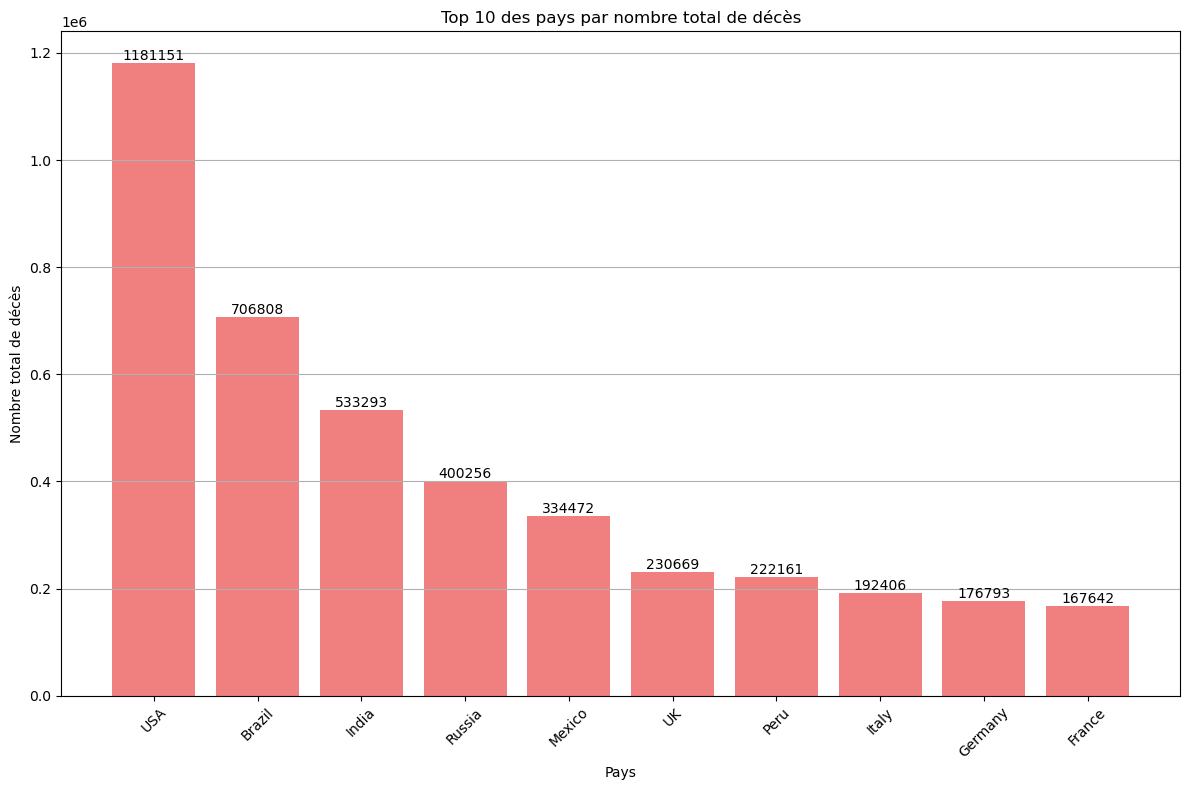

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('coronavirus.csv', sep=';')
excluded = ['World', 'Europe', 'North America', 'Asia', 'South America', 'Africa']
data_countries = data[~data['Country Other'].isin(excluded)]

sorted_data = data_countries.sort_values(by='Total Deaths', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country Other'], sorted_data['Total Deaths'], color='lightcoral')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.ylabel('Nombre total de décès')
plt.xlabel('Pays')
plt.title('Top 10 des pays par nombre total de décès')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

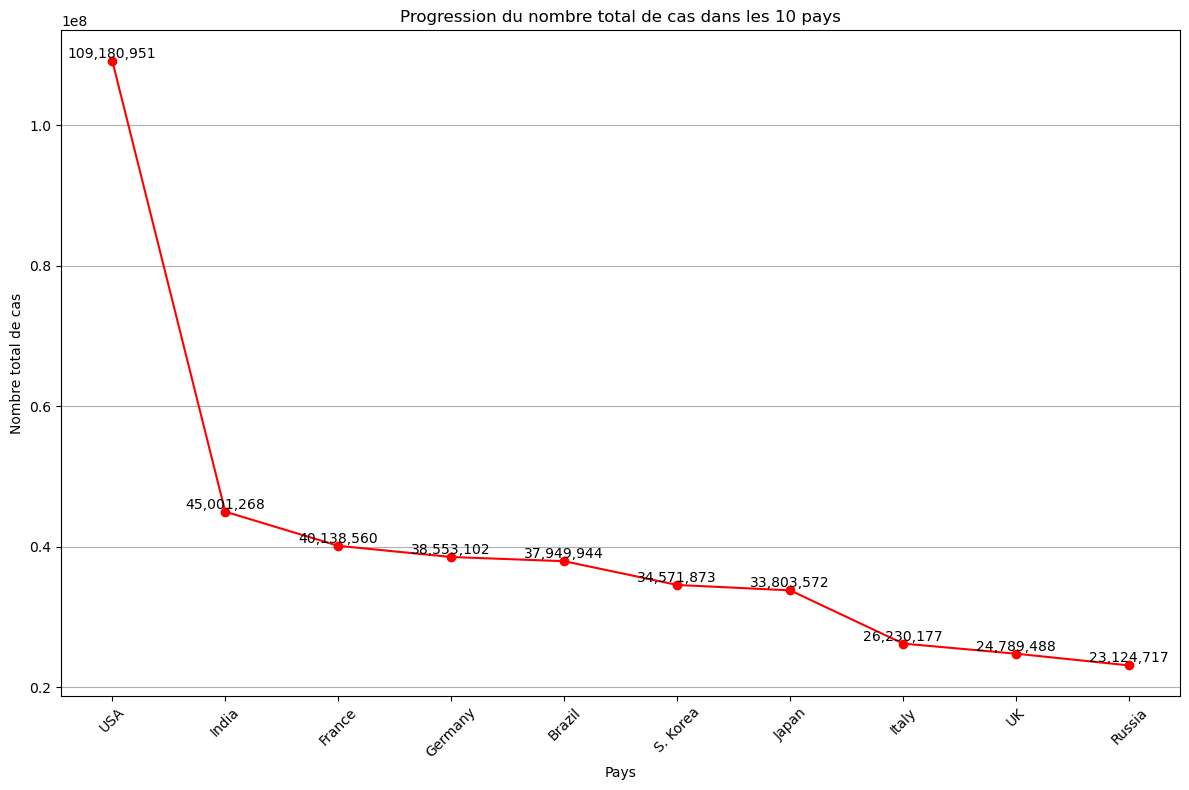

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('coronavirus.csv', sep=';')

excluded = ['World', 'Europe', 'North America', 'Asia', 'South America', 'Africa']
data_countries = data[~data['Country Other'].isin(excluded)]

sorted_data = data_countries.sort_values(by='Total Cases', ascending=False).head(10)

plt.figure(figsize=(12, 8))

plt.plot(sorted_data['Country Other'], sorted_data['Total Cases'], marker='o', linestyle='-', color='red', label='Progression')

for i, (x, y) in enumerate(zip(sorted_data['Country Other'], sorted_data['Total Cases'])):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.ylabel('Nombre total de cas')
plt.xlabel('Pays')
plt.title('Progression du nombre total de cas dans les 10 pays')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.tight_layout()
plt.show()


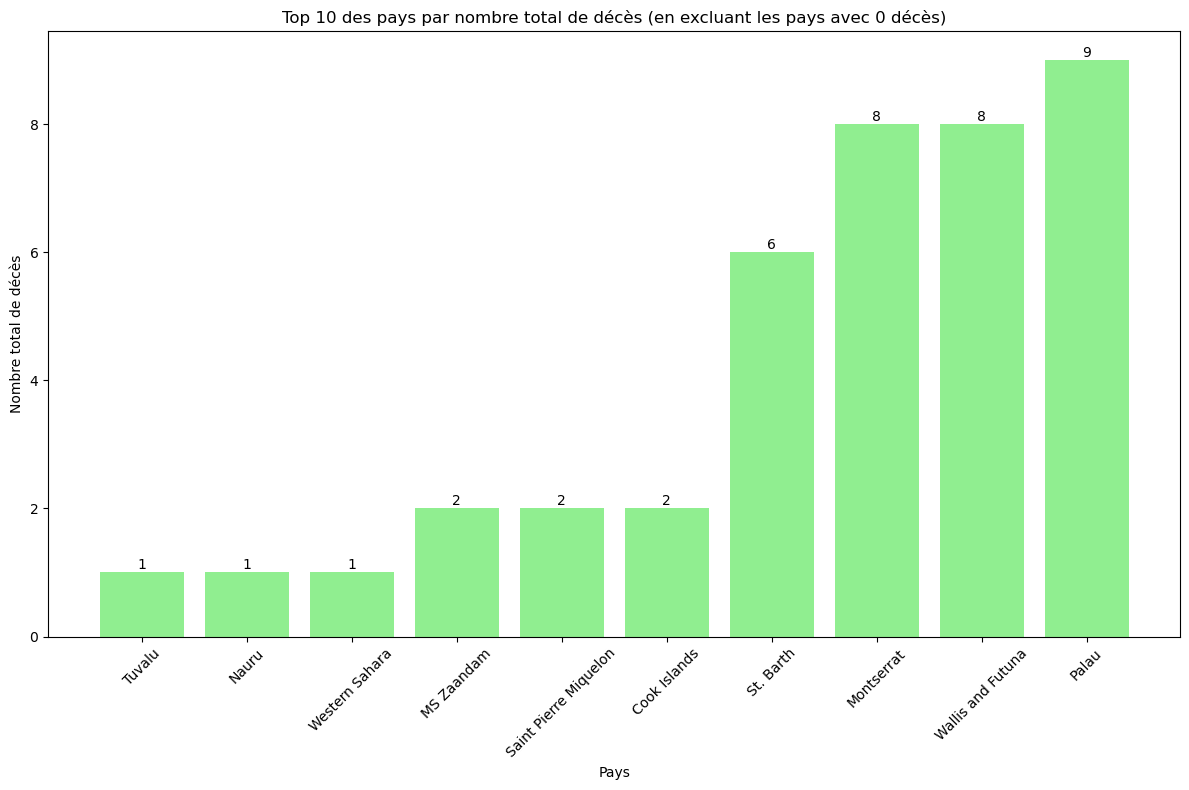

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('coronavirus.csv', sep=';')

excluded = ['World', 'Europe', 'North America', 'Asia', 'South America', 'Africa']
data_countries = data[~data['Country Other'].isin(excluded)]

data_countries = data_countries[data_countries['Total Deaths'] > 0]

sorted_data = data_countries.sort_values(by='Total Deaths').head(10)

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country Other'], sorted_data['Total Deaths'], color='lightgreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.ylabel('Nombre total de décès')
plt.xlabel('Pays')
plt.title('Top 10 des pays par nombre total de décès (en excluant les pays avec 0 décès)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


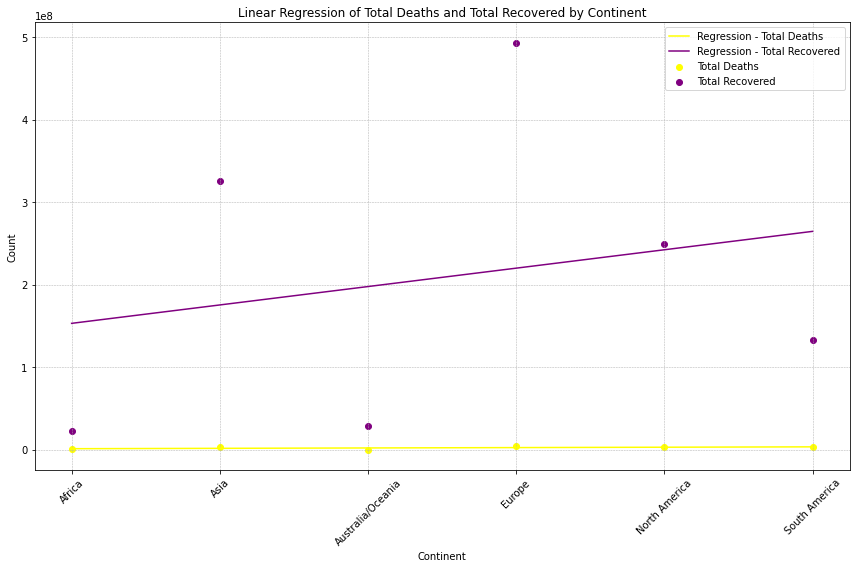

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
df = pd.read_csv('coronavirus.csv', sep=';')
 
grouped = df.groupby('Continent').sum()[['Total Deaths', 'Total Recovered']]
 
grouped = grouped.drop('World', errors='ignore')
grouped = grouped.drop('All', errors='ignore')
 
X = np.array(range(len(grouped))).reshape(-1, 1)
 
model_death = LinearRegression().fit(X, grouped['Total Deaths'])
predictions_death = model_death.predict(X)
 
model_recovered = LinearRegression().fit(X, grouped['Total Recovered'])
predictions_recovered = model_recovered.predict(X)
 
plt.figure(figsize=(12, 8))
plt.scatter(grouped.index, grouped['Total Deaths'], color='yellow', label='Total Deaths')
plt.plot(grouped.index, predictions_death, color='yellow', label='Regression - Total Deaths')
 
plt.scatter(grouped.index, grouped['Total Recovered'], color='purple', label='Total Recovered')
plt.plot(grouped.index, predictions_recovered, color='purple', label='Regression - Total Recovered')
 
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Linear Regression of Total Deaths and Total Recovered by Continent')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

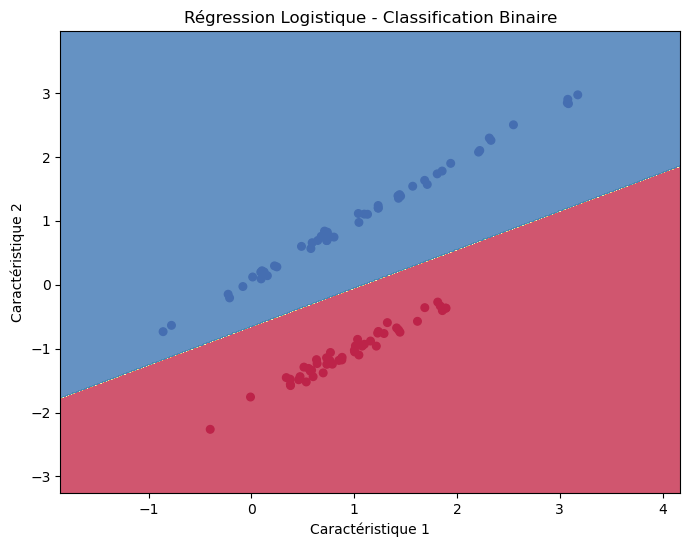

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

model = LogisticRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=30)
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

plt.title('Régression Logistique - Classification Binaire')
plt.show()
